In [42]:
import numpy as np
import matplotlib.pyplot as plt



Si $det(A)<>0$ entonces el sistema tiene una única solucion y se puede resolver el sistema $Ax=b$ tomando la inversa
$$
    A^{-1} A x=A^{-1}b = Ix=A^{-1}b  
$$
por lo tanto 
$$
x=A^{-1}b
$$

Un ejemplo es la interpolación polinómica donde se tienen diferentes pares ordenados $(x,y)$ y se puede ajustar mediante un polinomia de grado n-1

$$
    p(x)= c_0+c_1x+....+c_n x^{n}
$$

en forma matricial quedaría

$$
A=
\begin{bmatrix}
1 & X_1 & X_1^{n-1} \\
1 & X_2 & X_2^{n-1}\\
1 & X_3 & X_3^{n-1}\\
1 & X_n & X_n^{n-1}
\end{bmatrix}
$$ 

Siendo $A*c=Y$ y los elementos que hay que determinar es el vector c

Dados los tiempos t=(0,1,3,4) y las mediciones b=(0.8.8.20)

Buscamos un polinomio de grado 3 (n-1 mediciones) porque esa es una matriz cuadrada y lo puedo resolver con la inversa

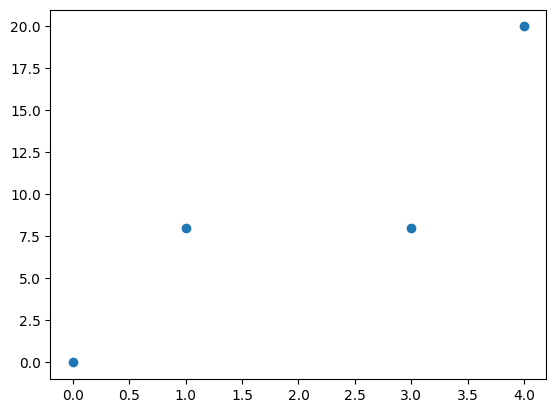

In [43]:
tiempos=[0,1,3,4]
mediciones=[0,8,8,20]

plt.plot(tiempos, mediciones, 'o', label='Datos')

In [44]:

#La matriz Ax=b ahora es Tx=m siendo T los tiempos y m las mediciones
# como es un una matriz de 4 necesito un polinomio de grado 3 para poder tener una matriz cuadrada
#entonces p(x) =c0+c1*t1 + c2*t2^2+ c3*t3+^3c4*t4^4
# la matriz T quedaria

T=[[1,0,0,0],
   [1,1,1,1],
   [1,3,9,27],
   [1,4,16,64]]
#Veamos el determinante
print(f"El determinante de T es: {np.linalg.det(T)}")
#Savemos que si T es <>= entonces tienen inversa
print("La inversa de T es:")
T_pinv=np.linalg.inv(T)
print(T_pinv)
print(T@T_pinv)
# Ahora hago T^{-1}*mediciones y obtengo x
T_inv=np.linalg.pinv(T)

print(T)
print(T_inv)
x=T_inv@mediciones
print("el vector de soluciones para un polinomio de grado 3 es")
print(x)

El determinante de T es: 72.0
La inversa de T es:
[[ 1.          0.          0.          0.        ]
 [-1.58333333  2.         -0.66666667  0.25      ]
 [ 0.66666667 -1.16666667  0.83333333 -0.33333333]
 [-0.08333333  0.16666667 -0.16666667  0.08333333]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.11022302e-16 -1.66533454e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1, 0, 0, 0], [1, 1, 1, 1], [1, 3, 9, 27], [1, 4, 16, 64]]
[[ 1.00000000e+00  2.30699207e-14 -7.41825608e-15  3.09996116e-15]
 [-1.58333333e+00  2.00000000e+00 -6.66666667e-01  2.50000000e-01]
 [ 6.66666667e-01 -1.16666667e+00  8.33333333e-01 -3.33333333e-01]
 [-8.33333333e-02  1.66666667e-01 -1.66666667e-01  8.33333333e-02]]
el vector de soluciones para un polinomio de grado 3 es
[ 1.87212540e-13  1.56666667e+01 -9.33333333e+00  1.66666667e+00]


In [45]:
## Graficamos el polinomio con la pseudo inversa

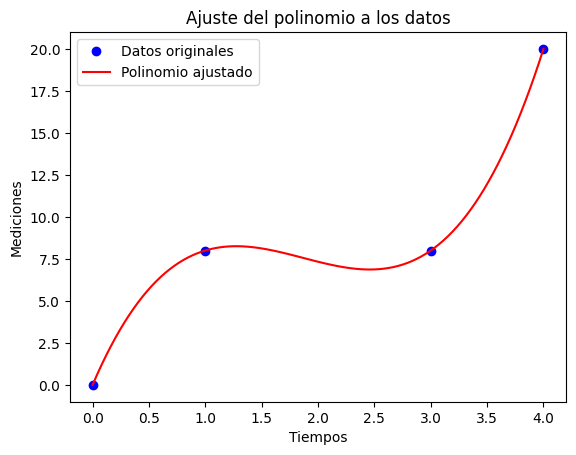

In [46]:

# Generar valores para el polinomio
t_vals = np.linspace(min(tiempos), max(tiempos), 100)  # Valores de t para graficar
polinomio_vals = x[0] + x[1]*t_vals + x[2]*t_vals**2 + x[3]*t_vals**3  # Evaluar el polinomio

# Graficar los datos originales y el polinomio ajustado
plt.plot(tiempos, mediciones, 'bo', label='Datos originales')  # Datos originales
plt.plot(t_vals, polinomio_vals, 'r-', label='Polinomio ajustado')  # Polinomio ajustado
plt.xlabel('Tiempos')
plt.ylabel('Mediciones')
plt.legend()
plt.title('Ajuste del polinomio a los datos')
plt.show()


In [47]:
#Ahora podemos calcular el error, sin embargo vemos que va a ser muy pequeño o cero
def polinomio_grado_3(t_vals):
    return  x[0] + x[1]*t_vals + x[2]*t_vals**2 + x[3]*t_vals**3

for i in range(len(tiempos)):
    error=0
    error=error+(mediciones[i]-polinomio_grado_3(tiempos[i]))**2

print(error)

2.0194839173657902e-28


## a) encontrar la recta y=c+dt que mejor se ajusta a los datos. Escriba las ecuaciones normales y resuelvalas. 

Tenemos el problema de minimizacion tal que hay que encontrar el minimo de: 
$$
    min  \frac{1}{2}|| Ax-Y||^2
$$

Donde A es la matriz de tiempos puesta en columna, mas la constante (unos) X es el vector con los coeficientes del polinomio por el cual quiero aproximar $y=c+dt$. Y b es la matriz mediciones
Si quisiera aproximar por un polinomio de grando n repito los tiempos elevandolos al grado correspondiente.

Minimizar es derivar e igualar a 0, entonces si derivo  la funcion de costos obtento

$$
  A^{T} (A X - Y)= 0
$$
Resolviendo queda: 
$$
    
$$
 

In [48]:
#Ahora tengo el problema de que tengo menos ecuaciones que incógnitas, porque tengo un polinomio de grado 1 o sea, 2 columnas
#Entonces uso las ecuaciones normales
tiempos=[0,1,3,4]
mediciones=[1,8,8,20]
constante=np.ones(len(mediciones))
A=np.column_stack((tiempos,constante))
print(A)


[[0. 1.]
 [1. 1.]
 [3. 1.]
 [4. 1.]]


In [49]:
A.T @ A

array([[26.,  8.],
       [ 8.,  4.]])

In [50]:
solution=np.linalg.solve(A.T @ A, A.T @ mediciones)

print(solution)


[3.8  1.65]


La Solucionen este caso es c=3.8 y b=1.65. La encontramos utilizando las ecuaciones normales. 
Tambien podemos ver de encontrarla usando la pseudoinversa:


In [51]:
pseudo_inv_A=np.linalg.pinv(A)
print(pseudo_inv_A)

[[-0.2  -0.1   0.1   0.2 ]
 [ 0.65  0.45  0.05 -0.15]]


Con esta pseudoinversa podemos solucionar el sistema Ax=B sindo X los coeficientes del polinomio por el cual quiero aproximar y B las mediciones

In [52]:
coeficientes_con_pinv=pseudo_inv_A@mediciones
print(coeficientes_con_pinv)

[3.8  1.65]


Si observamos son los mismos que obtubimos utilizando las ecuaciones normales

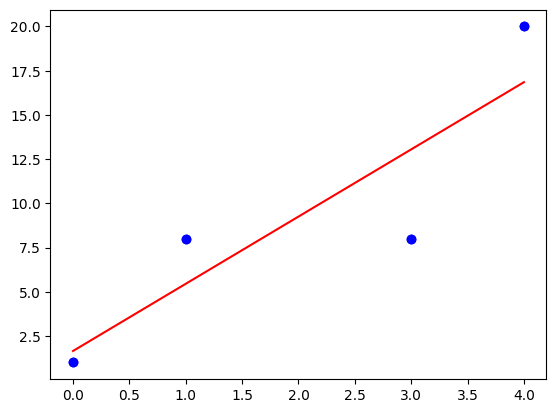

In [21]:
#Dibujamos la recta
t_vals = np.linspace(min(tiempos), max(tiempos), 100)  # Valores de t para graficar
polinomio_vals = solution[1] + solution[0]*t_vals  # Evaluar el polinomio

# Graficar los datos originales y el polinomio ajustado
plt.plot(tiempos, mediciones, 'bo', label='Datos originales')  # Datos originales
plt.plot(t_vals, polinomio_vals, 'r-', label='Polinomio ajustado')  # Polinomio ajustado
plt.plot(tiempos, mediciones, 'bo', label='Datos')

In [22]:
#Calculo el error de aproximar por medio de la recta con los parametros de solucion
errorTotal= 0
for i in range(len(tiempos)):
    mediciones_ajustadas= solution[0]*tiempos[i] + solution[1]
    error= (mediciones[i]-mediciones_ajustadas)
    print(f"Error en el tiempo {tiempos[i]}: {error}")
    errorTotal+= error**2
print(errorTotal)

Error en el tiempo 0: -0.6499999999999966
Error en el tiempo 1: 2.5500000000000025
Error en el tiempo 3: -5.050000000000001
Error en el tiempo 4: 3.1499999999999986
42.35000000000001


## Repetir con una línea recta horizontal y= c.

In [40]:
# tiempos y mediciones son iguales, lo que cambia es la matriz

#A= np.vstack((tiempos,np.ones(len(tiempos)))).T

A= np.vstack((np.ones(len(tiempos))))
print(A)
 


[[1.]
 [1.]
 [1.]
 [1.]]


In [41]:
solution=np.linalg.solve(A.T @ A, A.T @ mediciones)
print(solution)

[9.]


In [47]:
## calculo el error de aproximar por medio de la recta con los parametros de solucion
errorTotal= 0
for i in range(len(tiempos)):
    mediciones_ajustadas=solution[0]
    error=(mediciones[i]-mediciones_ajustadas)
    print(f"Error en el tiempo {tiempos[i]}: {error}")
    errorTotal+= error**2
print(errorTotal)

Error en el tiempo 0: -9.0
Error en el tiempo 1: -1.0
Error en el tiempo 3: -1.0
Error en el tiempo 4: 11.0
204.0


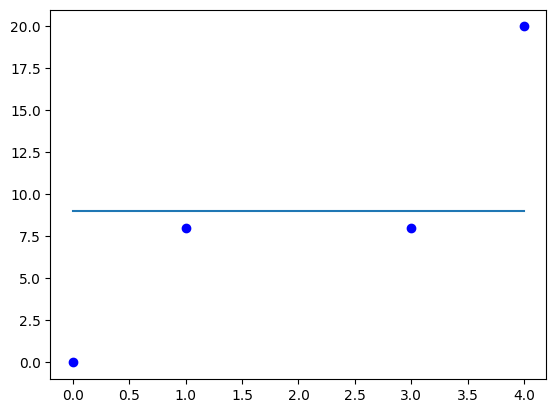

In [43]:
plt.plot(tiempos, mediciones, 'bo', label='Datos')
y=np.full_like(tiempos, solution[0])
plt.plot(tiempos, y)


c) Repetir con una línea recta que pasa por el origen y= dt.

In [55]:
# Se define la matriz de diseño
A= np.vstack((tiempos,np.zeros(len(tiempos)))).T

print(A)

# esta matriz es no singular asi que busco la pseudo inversa
#solution=np.linalg.solve(A.T @ A, A.T @ mediciones)
solucion = np.linalg.pinv(A) @ mediciones


print(solucion[0])

[[0. 0.]
 [1. 0.]
 [3. 0.]
 [4. 0.]]
4.307692307692308


In [56]:
## calculo el error de aproximar por medio de la recta con los parametros de solucion
errorTotal= 0
for i in range(len(tiempos)):
    mediciones_ajustadas=solucion[0]*tiempos[i]
    error=mediciones[i]-mediciones_ajustadas
    print(f"Error en el tiempo {tiempos[i]}: {error}")
    errorTotal+= error**2
print(errorTotal)

Error en el tiempo 0: 0.0
Error en el tiempo 1: 3.6923076923076916
Error en el tiempo 3: -4.923076923076925
Error en el tiempo 4: 2.7692307692307665
45.53846153846154


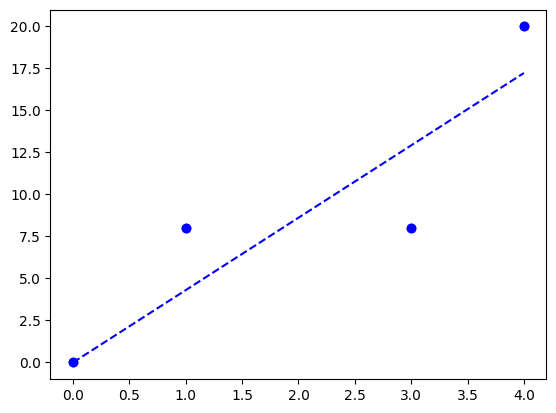

In [57]:
plt.plot(tiempos, mediciones, 'bo', label='Datos')

t_recta = np.linspace(0, 4, 100)  # Valores de t para la línea
y_recta = solucion[0] * t_recta  # y = 9t
plt.plot(t_recta, y_recta, color='blue', linestyle='--', label='y = 9t')  # Recta
plt.plot(tiempos, mediciones, 'bo', label='Datos originales')  # Datos originales



## Repetir con una parábola y= a+ bt+ ct2


In [61]:
tiempos=np.array([0,1,3,4])
mediciones=np.array([0,8,8,20])
tiempos_cuadraticos=np.square(tiempos)
constante=np.ones(len(mediciones))
A=np.column_stack((constante,tiempos,tiempos_cuadraticos))
print(A)

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


In [62]:
solucion_cuadratica=np.linalg.solve(A.T @ A, A.T @ mediciones)
print(solucion_cuadratica)


[2.         1.33333333 0.66666667]


In [63]:
errorTotal= 0
for i in range(len(tiempos)):
    mediciones_ajustadas=solucion_cuadratica[0]+solucion_cuadratica[1]*tiempos[i]+solucion_cuadratica[1]*(tiempos[i]**2)
    error=mediciones[i]-mediciones_ajustadas
    print(f"Error en el tiempo {tiempos[i]}: {error}")
    errorTotal+= error**2
print(errorTotal)

Error en el tiempo 0: -2.0000000000000067
Error en el tiempo 1: 3.333333333333349
Error en el tiempo 3: -9.999999999999872
Error en el tiempo 4: -8.666666666666451
190.22222222221606


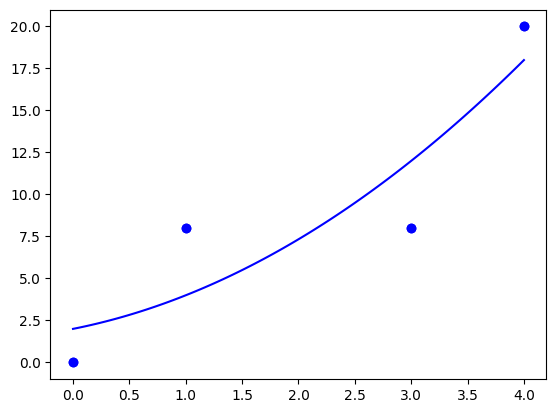

In [65]:
plt.plot(tiempos, mediciones, 'bo', label='Datos')

t_recta = np.linspace(0, 4, 100)  # Valores de t para la línea
y_recta = solucion_cuadratica[0]+solucion_cuadratica[1] * t_recta+solucion_cuadratica[2]*(t_recta**2)  # y = 9t
plt.plot(t_recta, y_recta, color='blue', linestyle='-', label='y = 9t')  # Recta
plt.plot(tiempos, mediciones, 'bo', label='Datos originales')  # Datos originales